In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [249]:
x,y=make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=1)

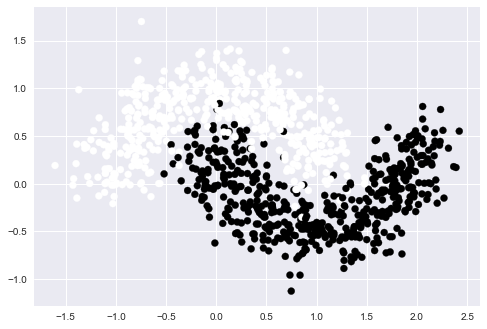

In [250]:
plt.scatter(x[:,0],x[:,1],c=y)

In [251]:
input_size=2                     # no. of features
layers=[4,3]                  # number of neurons in first hidden layer is 4 and in second hidden layer -3
output_size=2            # no. of neurons in output layer


In [252]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [253]:
#let us define the architecture
# step 1
class neuralnetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={}
        model["w1"]=np.random.randn(input_size,layers[0])
        model["b1"]=np.zeros((1,layers[0]))
        
        model["w2"]=np.random.randn(layers[0],layers[1])
        model["b2"]=np.zeros((1,layers[1]))
        
        model["w3"]=np.random.randn(layers[1],output_size)
        model["b3"]=np.zeros((1,output_size))
        
        self.model=model

# step 2-- forward propagation
    

    def forward(self,x):                   #x is the input matrix
        w1,w2,w3=self.model["w1"],self.model["w2"],self.model["w3"]
        b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
    
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)                #applying the activation function
    
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
    
        z3=np.dot(a2,w3)+b3
        y_=softmax(z3)
    
        #storing the outputs of each layer for back_propagation                     
        self.activation_outputs=(a1,a2,y_)
        return y_

#step-3---backward propagation

    def backward(self,x,y,learning_rate=0.001):
    
        w1,w2,w3=self.model["w1"],self.model["w2"],self.model["w3"]
        b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
    
        a1,a2,y_=self.activation_outputs
    
        m=x.shape[0]
    
        delta3 = y_-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
    
        delta2=(1-np.square(a2)) *np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
    
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
    
    #step-4 ---- update the model parameters using gradient descent
    
        self.model["w1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
    
        self.model["w2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["w3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
    
    
#step-5 ---- predict

    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)


#summary 

    def summary(self):
        w1,w2,w3=self.model["w1"],self.model["w2"],self.model["w3"]
        a1,a2,y_=self.activation_outputs
    
        print("w1",w1.shape)
        print("a1",a1.shape)
        print("w2",w2.shape)
        print("a2",a2.shape)
        print("w3",w3.shape)
        print("y_",y_.shape)


In [254]:
    
# loss function

def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l
    
# one-hot-vector 

def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [255]:
w1=np.random.randn(input_size,layers[0])
print(w1)

[[-1.34775906 -1.270485    0.96939671 -1.17312341]
 [ 1.94362119 -0.41361898 -0.74745481  1.92294203]]


In [256]:
# making objects of the class
model = neuralnetwork ( input_size=2, layers = [13,5] , output_size=2)
#model.forward ( [x[0]] )
#model.summary()

In [257]:
def train(x,y,model,epochs,logs=True):
    training_loss=[]
    
    classes=len(np.unique(y))
    
    y_oht=one_hot(y,classes)
    
    for ix in range(epochs):
        
        y_=model.forward(x)
        
        l=loss(y_oht,y_)
        
        #training_loss.append(l)
        model.backward(x,y_oht)
        
        if(logs and ix%50==0):
            print("epoch %d loss %.4f"%(ix,l),end='\n')

In [258]:
train(x,y,model,1000)

epoch 0 loss 0.7785
epoch 50 loss 0.1307
epoch 100 loss 0.1240
epoch 150 loss 0.1115
epoch 200 loss 0.1030
epoch 250 loss 0.0915
epoch 300 loss 0.0808
epoch 350 loss 0.0747
epoch 400 loss 0.0708
epoch 450 loss 0.0679
epoch 500 loss 0.0657
epoch 550 loss 0.0639
epoch 600 loss 0.0624
epoch 650 loss 0.0612
epoch 700 loss 0.0609
epoch 750 loss 0.0602
epoch 800 loss 0.0601
epoch 850 loss 0.0539
epoch 900 loss 0.0521
epoch 950 loss 0.0522


In [259]:
model.summary()

w1 (2, 13)
a1 (1000, 13)
w2 (13, 5)
a2 (1000, 5)
w3 (5, 2)
y_ (1000, 2)


In [260]:
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)

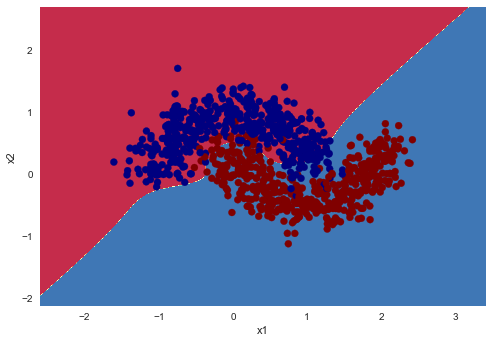

In [261]:

plot_decision_boundary(lambda x :model.predict(x),x,y)

In [262]:
outputs=model.predict(x)

In [263]:
outputs

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [264]:
outputs==y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [265]:
training_accuracy=np.sum(outputs==y)/y.shape[0]

In [266]:
print("training_accuracy %.4f"%(training_accuracy*100))

training_accuracy 93.8000
